# Tutorial 9: Part 3

In [1]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

## Example 3
SOM on more synthetic data (linear progressive wave)

In [2]:
#create the input data
k = 2*np.pi/100
omega = 2*np.pi/50
x = [float(ii) for ii in range(1,101)]
t = [float(ii) for ii in range(1,201)]
y = []

for ii in range(200):
    yii = [np.sin(k*x[jj] - omega*t[ii])+2 for jj in range(100)]
    y.append(yii)

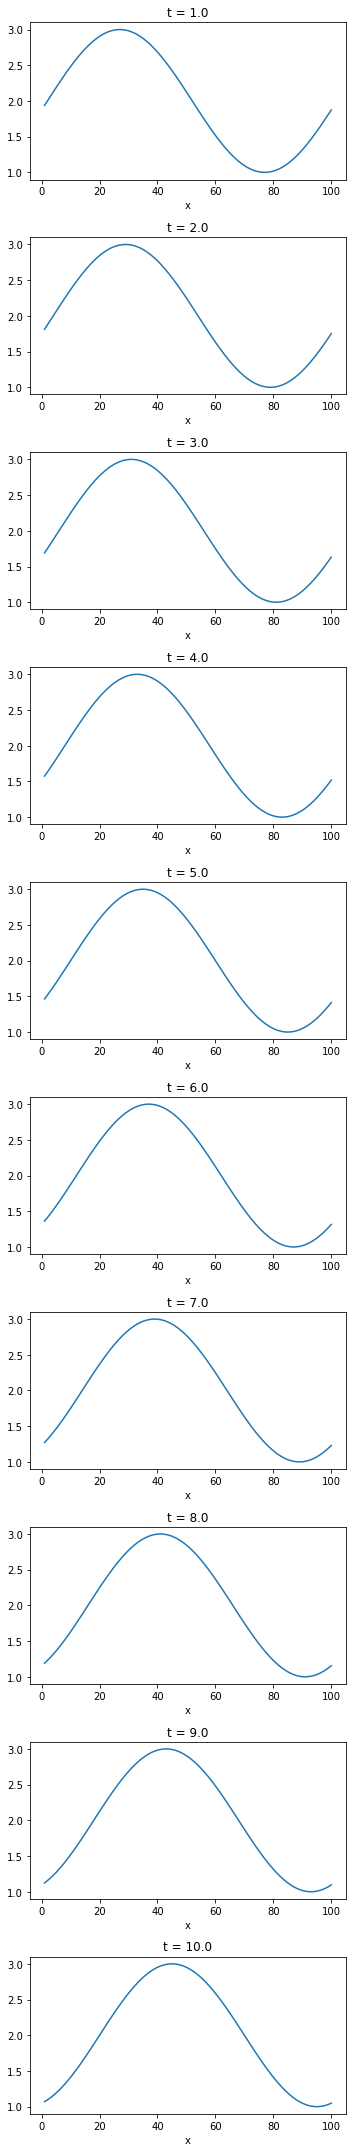

In [3]:
#visualize the spatial wave (in x domain) for first few time steps
#note that it propagates forward in time

plt.figure(figsize=(5,30))
for ii in range(10):
    plt.subplot(10,1,ii+1)
    plt.plot(x,y[ii])
    plt.xlabel('x')
    plt.title('t = '+str(t[ii]))
    
plt.tight_layout()
plt.show()

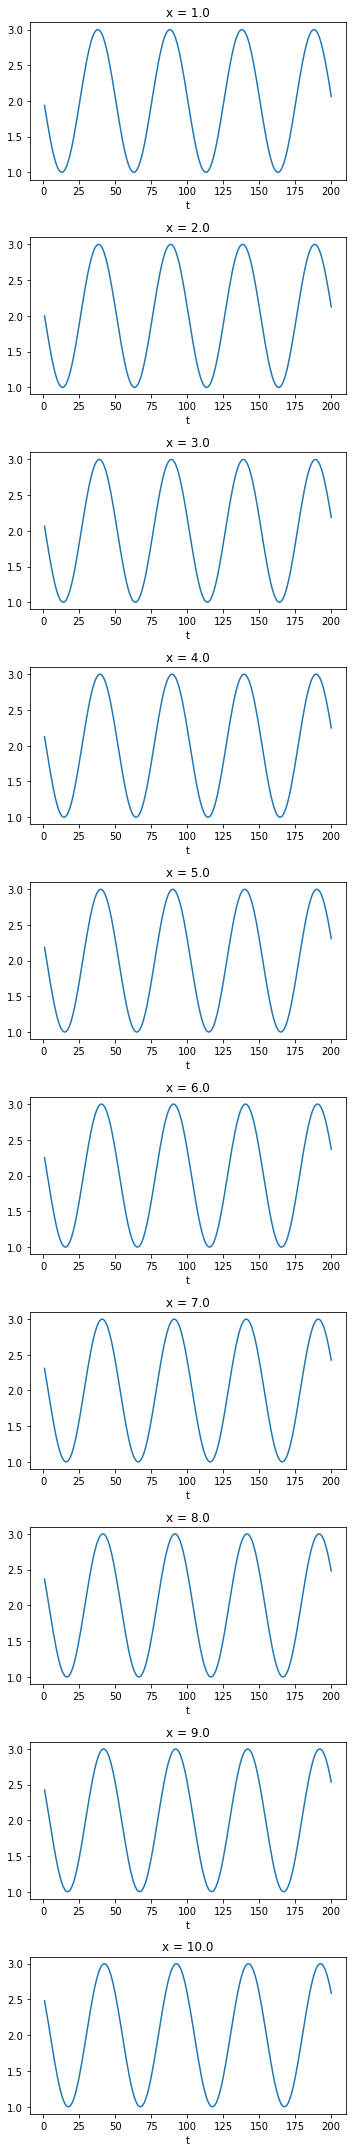

In [4]:
#visualize temporal wave (in t domain) for each point in x
plt.figure(figsize = (5,30))
for ii in range(10):
    plt.subplot(10,1,ii+1)
    plt.plot(t,np.transpose(y)[ii])
    plt.xlabel('t')
    plt.title('x = '+str(x[ii]))
    
plt.tight_layout()
plt.show()

In [8]:
#run SOM -- this code creates/trains the SOM and calculates stats of interest

nx = 3
ny = 4

data = np.asarray(y)

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
som.pca_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

#calculate the BMU of each observation
bmus = []
bmus_num = []
for kk in range(len(data)):
    bmus.append(som.winner(data[kk]))
    num = bmus[kk][0]*nx + bmus[kk][1]
    bmus_num.append(num)
    
#inds gives the sequential coordinates of each SOM node (useful for plotting)
inds = []
for ii in range(ny):
    for jj in range(nx):
        inds.append((ii,jj))
     
#compute the frequency of each BMU
freq = np.zeros((nx,ny))
for bmu in bmus:
    freq[bmu[0]][bmu[1]]+=1
freq/=len(data)

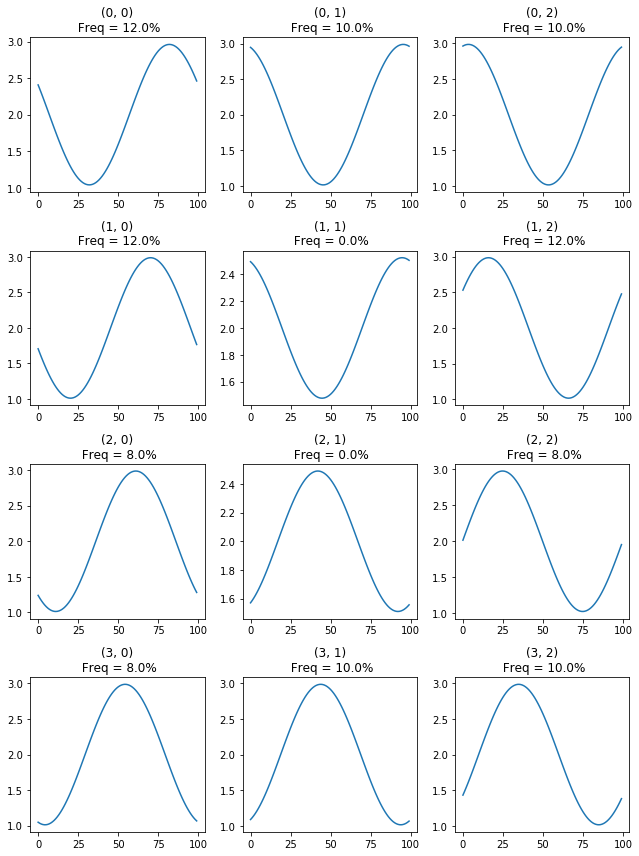

In [9]:
#visualize

plt.figure(figsize=(3*nx,3*ny))
for kk in range(nx*ny):   
    plt.subplot(ny,nx,kk+1)
    indx = inds[kk][1]
    indy = inds[kk][0]
    plt.plot(bmu_patterns[indx][indy])
    plt.title(str(inds[kk]) + '\n Freq = ' + str(freq[indx][indy]*100)[:4] + '%')
    
plt.tight_layout()

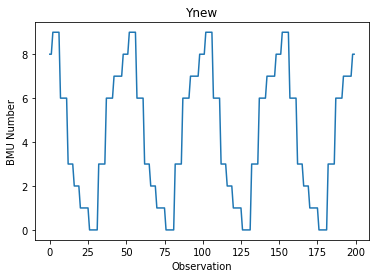

In [10]:
#visualize clustered data
plt.plot(bmus_num)
plt.xlabel('Observation')
plt.ylabel('BMU Number')
plt.title('Ynew')
plt.show()

In [12]:
np.shape(bmus)

(200, 2)